In [1]:
# import libraries 

import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import scipy.stats as stats
from sklearn.model_selection import train_test_split
%matplotlib inline


In [2]:
# let's start by reading the train and test dataset.

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
train_df[(train_df['GrLivArea'] > 4000)][['SalePrice','GrLivArea']]
train_df.drop(train_df[(train_df['GrLivArea'] > 4000)].index,inplace=True)


In [5]:
# log1p calculates log(1 + input)

train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

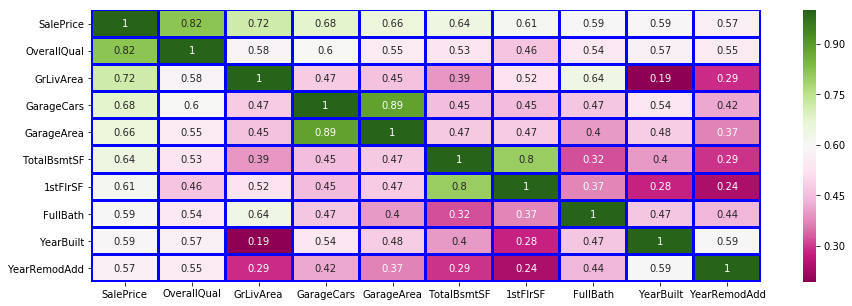

In [6]:
plt.figure(figsize=(15,5))

# correlation table
corr_train = train_df.corr()

# select top 10 highly correlated variables with SalePrice
num = 10
col = corr_train.nlargest(num, 'SalePrice')['SalePrice'].index
coeff = np.corrcoef(train_df[col].values.T)

# heatmap
heatmp = sns.heatmap(coeff, annot = True, xticklabels = col.values, yticklabels = col.values, linewidth=2,cmap='PiYG', linecolor='blue')

/Users/mi-tomoya/.pyenv/versions/3.6.5/envs/ur5/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


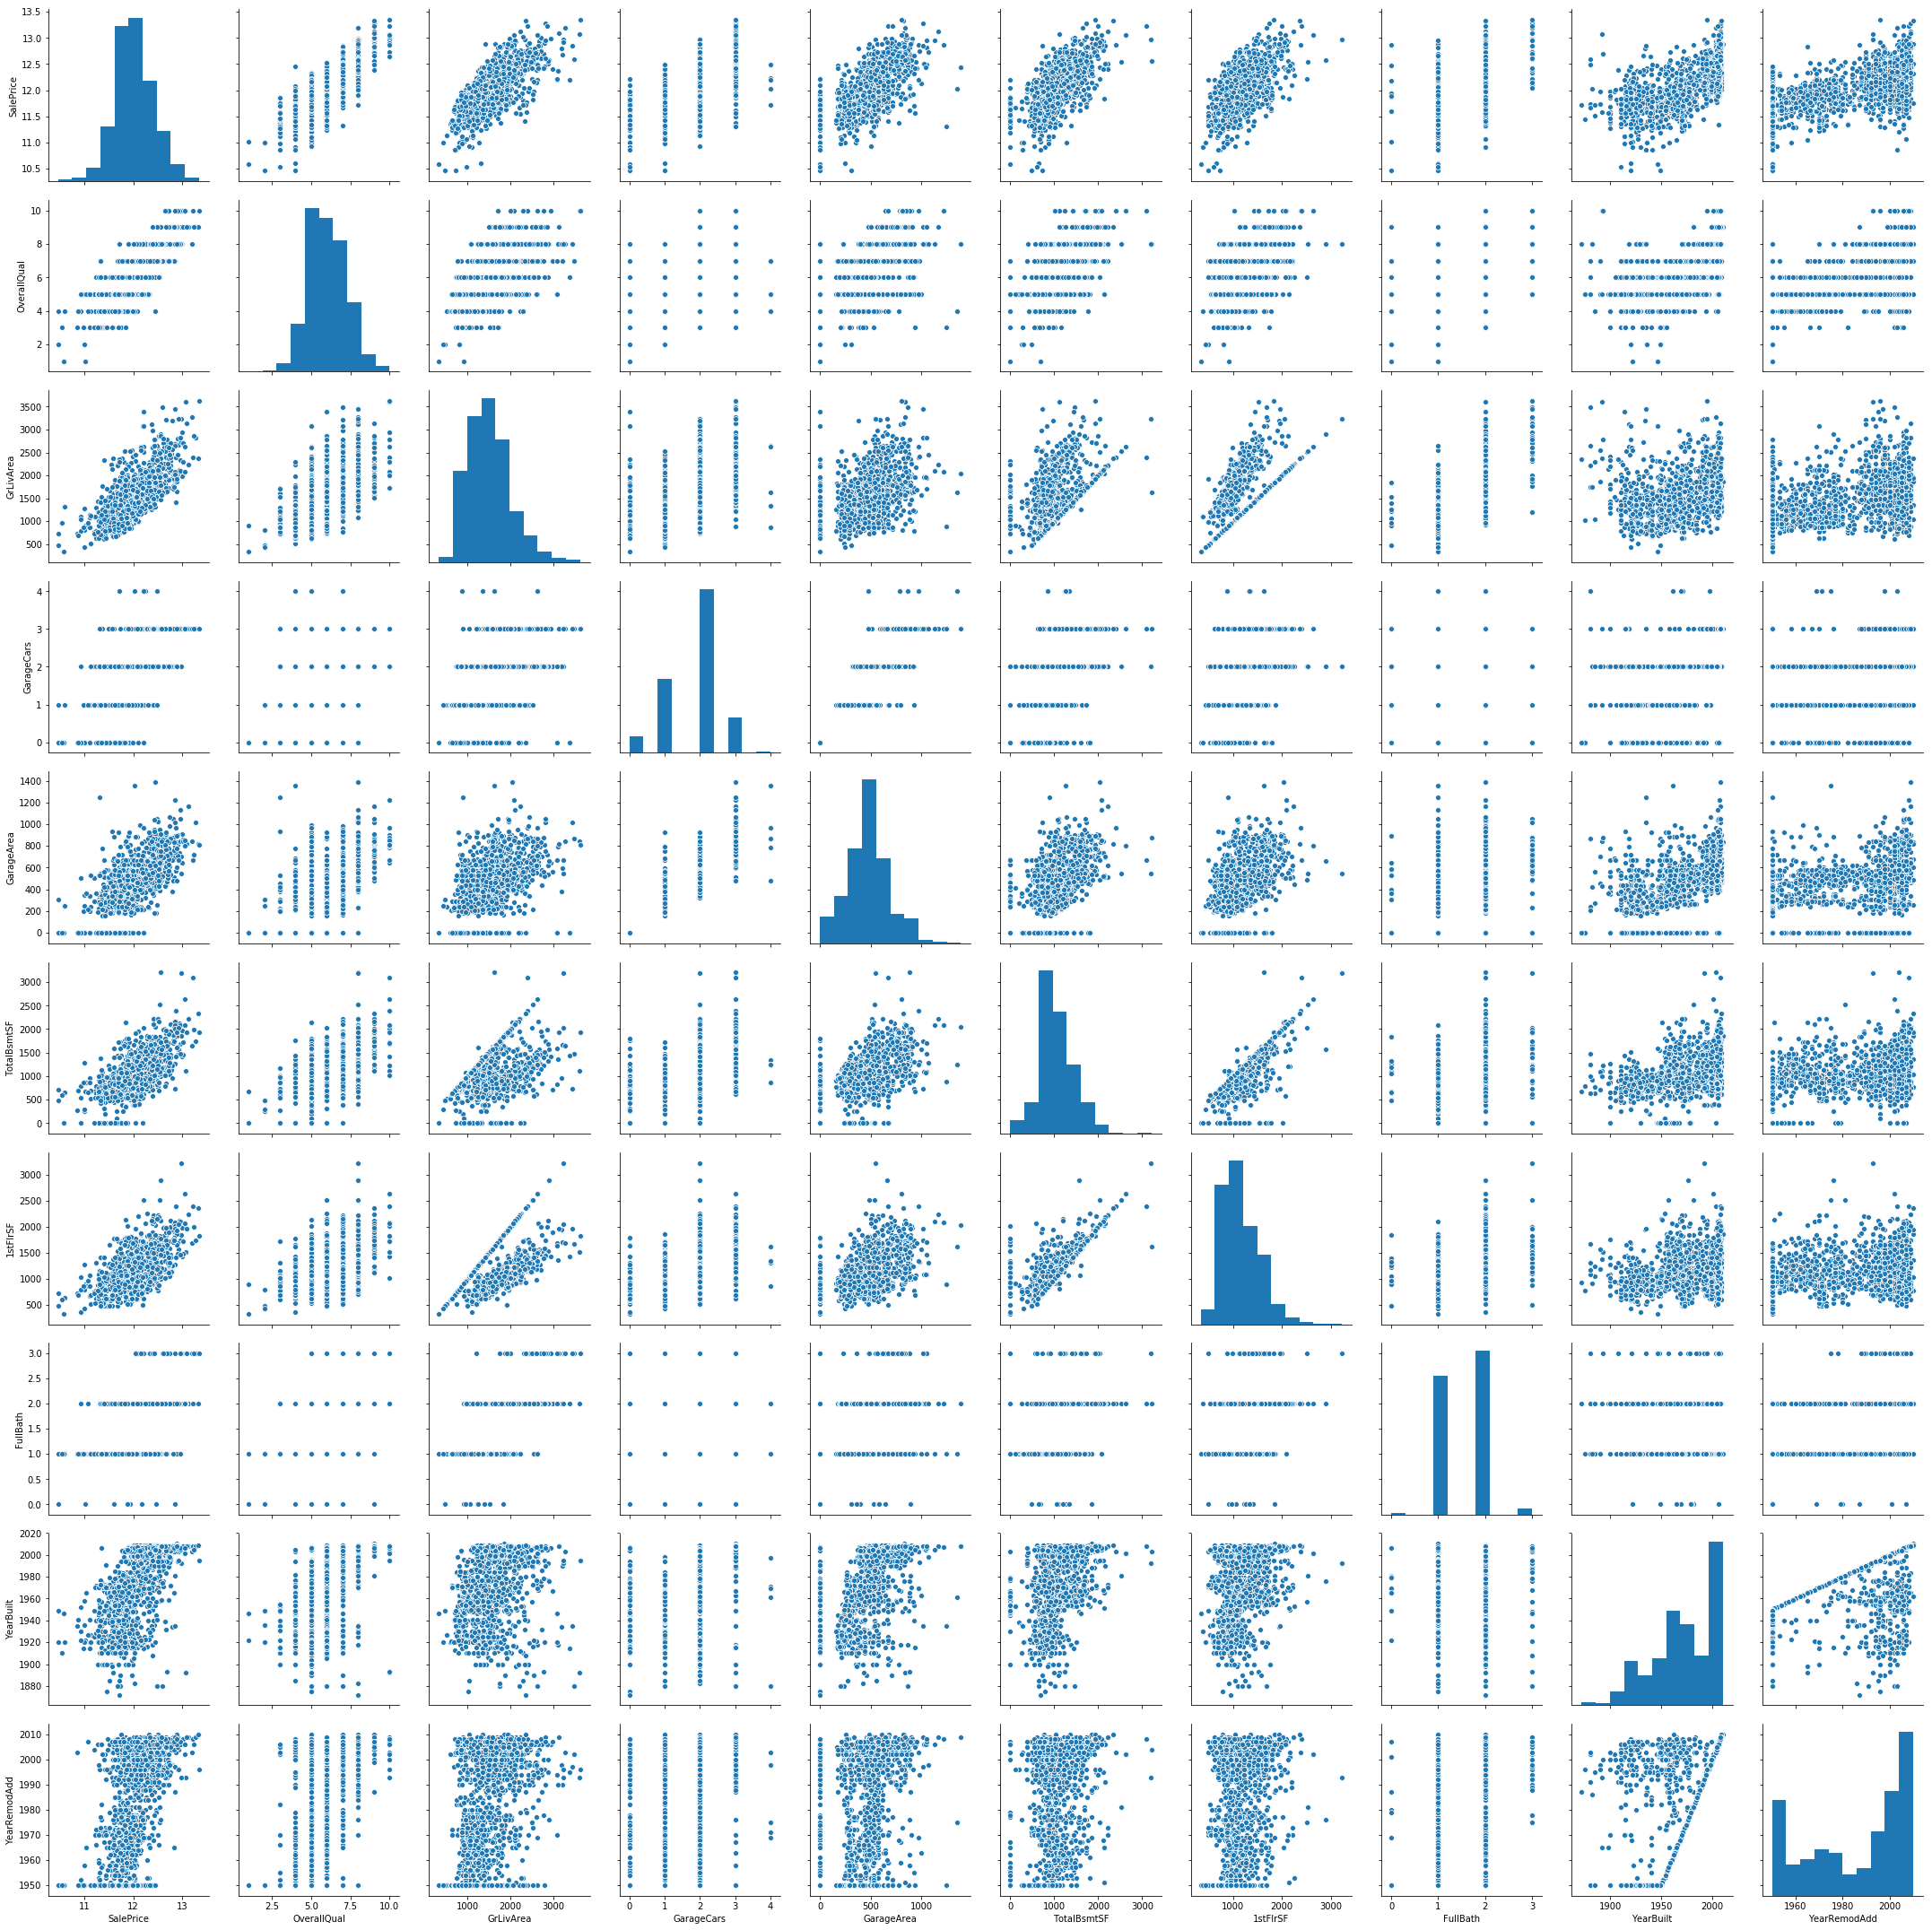

In [7]:
sns.pairplot(train_df[col], size=3);

In [8]:
y_df = train_df['SalePrice']
train_df.drop('SalePrice',axis=1,inplace=True)

print('dimension of the train:' , train_df.shape)
print('dimension of the test:' , test_df.shape)

dimension of the train: (1456, 80)
dimension of the test: (1459, 80)


In [9]:
df = pd.concat([train_df, test_df]).reset_index()

df.drop(['index'],axis=1,inplace=True)

In [10]:
print('dimension of the dataset:' , df.shape)
df.head()

dimension of the dataset: (2915, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [11]:
mc = pd.DataFrame(df.isnull().sum(),columns=['Missing Count'])
mc = mc[mc['Missing Count']!=0]
mc['Missing %'] = (mc['Missing Count'] / df.shape[0]) * 100
mc.sort_values('Missing %',ascending=False)

,Missing Count,Missing %
PoolQC,2907,99.725557
MiscFeature,2810,96.397942
Alley,2717,93.207547
Fence,2345,80.445969
FireplaceQu,1420,48.713551
LotFrontage,486,16.672384
GarageFinish,159,5.454545
GarageQual,159,5.454545
GarageCond,159,5.454545
GarageYrBlt,159,5.454545


In [12]:
nones = ['PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu', 'GarageType','GarageFinish',
        'GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'MasVnrType']

for none in nones:
    df[none].fillna('None',inplace = True)

In [13]:
zeros = ['GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         'BsmtFullBath','BsmtHalfBath','MasVnrArea']

for zero in zeros:
    df[zero].fillna(0, inplace = True)

In [14]:
Counter(df.Utilities)

Counter({'AllPub': 2912, 'NoSeWa': 1, nan: 2})

In [15]:
df.drop('Utilities',axis=1, inplace=True)

In [16]:
freq = ['MSZoning','Exterior1st','Exterior2nd','SaleType','Electrical','KitchenQual','Functional']

for fr in freq:
    df[fr].fillna(df[fr].mode()[0], inplace=True)

In [17]:
df['old_lotfrontage'] = df['LotFrontage']

df['LotFrontage'] = df.groupby(['LotArea','Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

/Users/mi-tomoya/.pyenv/versions/3.6.5/envs/ur5/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1019: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


/Users/mi-tomoya/.pyenv/versions/3.6.5/envs/ur5/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


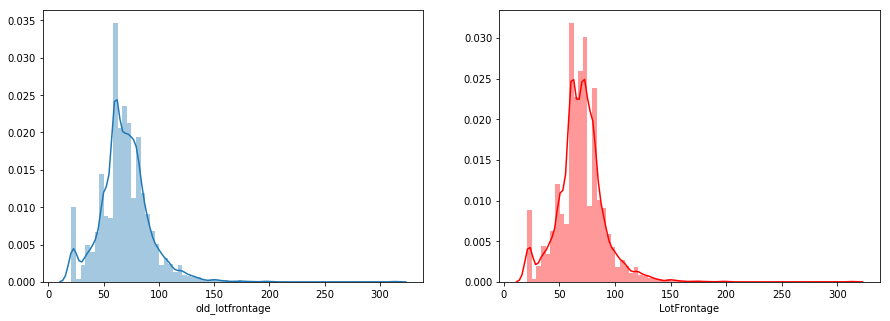

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ol = sns.distplot(df['old_lotfrontage'].dropna(),ax=ax1,kde=True,bins=70)
lf = sns.distplot(df['LotFrontage'],ax=ax2,kde=True,bins=70,color='red')

# drop the old_lotfrontage as we finished the comparison
df.drop('old_lotfrontage',axis=1,inplace=True)

In [19]:
print("Remaining missing values:",df.isnull().sum().sum())

Remaining missing values: 0


In [20]:
df['MoSold'] = df.astype(str)
df['YrSold'] = df.astype(str)
df['MSSubClass'] = df.astype(str)

nominals = ['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
           'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','GarageType','MiscFeature','SaleType','SaleCondition','MoSold','YrSold']

In [21]:
from sklearn.preprocessing import LabelEncoder

ordinals = ['LotShape','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual',
           'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual',
            'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']

for ordinal in ordinals:
    le = LabelEncoder()
    le.fit(df[ordinal])
    df[ordinal] = le.transform(df[ordinal])

In [22]:
# Total square feet of houses

df['totalArea'] = df['GrLivArea'] + df['TotalBsmtSF']

In [23]:
# Assign numeric features by excluding non numeric features
numeric = df.dtypes[df.dtypes != 'object'].index

# Display the skewness of each column and sort the values in descending order 
skewness = df[numeric].apply(lambda x: x.skew()).sort_values(ascending=False)

# Create a dataframe and show 5 most skewed features 
sk_df = pd.DataFrame(skewness,columns=['skewness'])
sk_df['skw'] = abs(sk_df)
sk_df.sort_values('skw',ascending=False).drop('skw',axis=1).head()

,skewness
PoolQC,-22.996032
MiscVal,21.943440
PoolArea,18.711459
LotArea,13.130516
LowQualFinSF,12.086535


In [24]:
# As a general rule of thumb, skewness with an absolute value less than 0.5 is considered as a acceptable range of skewness for normal distribution of data
skw_feature = skewness[abs(skewness) > 0.5].index

# Transform skewed features to normal distribution by taking log(1 + input)
df[skw_feature] = np.log1p(df[skw_feature])

In [25]:
df = pd.get_dummies(df)
print(df.shape)

(2915, 8963)


In [26]:
X_train = df[:train_df.shape[0]]
X_test = df[train_df.shape[0]:]

In [27]:
print("training shape:{}, test shape:{}".format(X_train.shape,X_test.shape))

training shape:(1456, 8963), test shape:(1459, 8963)


In [30]:
# Import libraries

from sklearn.model_selection import GridSearchCV,learning_curve, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.linear_model import LassoCV,ElasticNetCV,Lasso,ElasticNet
from sklearn.kernel_ridge import KernelRidge

from mlxtend.regressor import StackingRegressor
from xgboost import XGBRegressor

In [31]:
print(X_train.shape, X_test.shape,y_df.shape)

(1456, 8963) (1459, 8963) (1456,)


In [32]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
#X_train = RobustScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = df.columns )

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = df.columns)
#X_test = RobustScaler().fit_transform(X_test)

/Users/mi-tomoya/.pyenv/versions/3.6.5/envs/ur5/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mi-tomoya/.pyenv/versions/3.6.5/envs/ur5/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/Users/mi-tomoya/.pyenv/versions/3.6.5/envs/ur5/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [33]:
kfold = KFold(n_splits=20, random_state= 0, shuffle = True)

In [34]:
def rmsle_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_df, scoring="neg_mean_squared_error", cv = kfold))
    return(rmse)

In [35]:
KR = KernelRidge()

KR_param_grid = {
    'alpha' : [0.93],
    'kernel' : ['polynomial'],
    'gamma':[0.001],
    'degree': [3],
    'coef0': [1.5]
}

KR_CV = GridSearchCV(KR, param_grid = KR_param_grid, cv = kfold, scoring = "neg_mean_squared_error",n_jobs = -1, verbose = 1)
KR_CV.fit(X_train, y_df)
KR_best = KR_CV.best_estimator_
print(KR_best)



Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   29.8s finished


KernelRidge(alpha=0.93, coef0=1.5, degree=3, gamma=0.001, kernel='polynomial',
      kernel_params=None)


In [36]:
y_submission_1 = np.expm1(KR_best.predict(X_test))
score = rmsle_cv(KR_best)
print("Kernel Ridge mean score:", score.mean())
print("Kernel Ridge std:", score.std())

Kernel Ridge mean score: 0.6100018027495417
Kernel Ridge std: 0.03397565215460989


In [37]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0005, 0.0008, 0.001, 0.003, 0.007, 0.009, 0.01, 0.03, 0.05, 0.07, 0.09, 0.2, 0.4, 0.6, 0.8, 1, 1.2], random_state = 1, n_jobs = -1, verbose = 1)
lasso.fit(X_train, y_df)
alpha = lasso.alpha_
print("Optimized Alpha:", alpha)

lasso = LassoCV(alphas = alpha * np.linspace(0.5,1.5,20), cv = kfold, random_state = 1, n_jobs = -1)
lasso.fit(X_train, y_df)
alpha = lasso.alpha_
print("Final Alpha:", alpha)

/Users/mi-tomoya/.pyenv/versions/3.6.5/envs/ur5/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
.........................................................[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.7s finished


Optimized Alpha: 0.003
Final Alpha: 0.0016578947368421052


In [ ]:
print("Lasso mean score:", rmsle_cv(lasso).mean())
print("Lasso std:", rmsle_cv(lasso).std())
y_submission_2 = np.expm1(lasso.predict(X_test))

In [42]:
elnet = ElasticNetCV(alphas = [0.0001, 0.0003, 0.0005, 0.0008, 0.001, 0.003, 0.007, 0.009, 0.01, 0.03, 0.05, 0.07, 0.09, 0.2, 0.4, 0.6, 0.8, 1, 1.2] 
                ,l1_ratio = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
                ,cv = kfold, random_state = 1, n_jobs = -1)
elnet.fit(X_train, y_df)
alpha = elnet.alpha_
ratio = elnet.l1_ratio_
print("Optimized Alpha:", alpha)
print("Optimized l1_ratio:", ratio)

elnet = ElasticNetCV(alphas = alpha * np.linspace(0.5,1.5,20), l1_ratio = ratio * np.linspace(0.9,1.3,6), 
                     cv = kfold, random_state = 1, n_jobs = -1)
elnet.fit(X_train, y_df)

alpha = elnet.alpha_
ratio = elnet.l1_ratio_

print("Final Alpha:", alpha)
print("Final l1_ratio:", ratio)

Optimized Alpha: 0.003
Optimized l1_ratio: 0.1
Final Alpha: 0.0033947368421052633
Final l1_ratio: 0.13


In [43]:
y_submission_3 = np.expm1(elnet.predict(X_test))

In [44]:
epsilons = [0.03]
degrees = [2]
coef0s = [1.6]

gammas = ['auto']
Cs = [0.1]
kernels = ['poly']

param_grid = dict(C=Cs, epsilon = epsilons, gamma=gammas, kernel=kernels, degree= degrees, coef0=coef0s)
SVMR = GridSearchCV(SVR(), param_grid = param_grid, cv = kfold, scoring = "neg_mean_squared_error",n_jobs = -1,verbose = 1)

SVMR.fit(X_train,y_df)
SVMR_best = SVMR.best_estimator_
print(SVMR.best_params_)

Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.3min finished


{'C': 0.1, 'coef0': 1.6, 'degree': 2, 'epsilon': 0.03, 'gamma': 'auto', 'kernel': 'poly'}


In [45]:
y_submission_4 = np.expm1(SVMR.predict(X_test))

In [46]:
RFC = RandomForestRegressor(random_state = 1)

rf_param_grid = {"max_depth": [None],
              "max_features": [88],
              "min_samples_leaf": [1],
              "n_estimators" :[570]
                }

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv = kfold, scoring = "neg_mean_squared_error", n_jobs = -1, verbose = 1)
gsRFC.fit(X_train,y_df)
RFC_best = gsRFC.best_estimator_
print(gsRFC.best_params_)

Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.4min finished


{'max_depth': None, 'max_features': 88, 'min_samples_leaf': 1, 'n_estimators': 570}


In [47]:
y_submission_5 = np.expm1(gsRFC.predict(X_test))

In [ ]:
XGB = XGBRegressor()

xg_param_grid = {
              'n_estimators' :[870],
              'learning_rate': [0.04],
              
              'max_depth': [3],
              'min_child_weight':[0.2],
              
              'gamma': [0],
                
              'subsample':[0.8],
              'colsample_bytree':[0.7]
    
              #'reg_alpha':[0.08,0.09,0.095,0.1,0.15,0.2],
              #'reg_lambda':[0,0.001,0.002]
              }
                
gsXGB = GridSearchCV(XGB,param_grid = xg_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= -1, verbose = 1)
gsXGB.fit(X_train,y_train)
XGB_best = gsXGB.best_estimator_
print(gsXGB.best_params_)

In [ ]:
y_submission_6 = np.expm1(gsXGB.predict(X_test))

In [ ]:
XGB = XGBRegressor()

ELNET = ElasticNet(random_state = 1)
LCV=Lasso(random_state = 1)
SV = SVR()
KR = KernelRidge()
XG = XGBRegressor()
stack = StackingRegressor(regressors = [ELNET,LCV,XG],meta_regressor = XGB)

params = {       
              'meta-xgbregressor__n_estimators' : [740*2],#740
              'meta-xgbregressor__learning_rate': [0.01/2], #0.01
              'meta-xgbregressor__min_child_weight':[0],
              'meta-xgbregressor__gamma':[0.1],
              'meta-xgbregressor__max_depth': [2],
              'meta-xgbregressor__subsample':[0.65],
              'meta-xgbregressor__colsample_bytree':[0.4],
              'meta-xgbregressor__reg_alpha':[0],
              'meta-xgbregressor__reg_lambda':[1],
              
              'lasso__alpha':[0.00244736842105],
              'elasticnet__alpha':[0.0276315789474],
              'elasticnet__l1_ratio':[0.09],
              'xgbregressor__min_child_weight':[0.2],
              'xgbregressor__n_estimators' : [870],
              'xgbregressor__learning_rate': [0.04],
              'xgbregressor__gamma':[0],
              'xgbregressor__max_depth': [3],
              'xgbregressor__subsample':[0.8],
              'xgbregressor__colsample_bytree':[0.7]
    
              #'kernelridge__alpha':[0.93],
              #'kernelridge__coef0':[1.5],
              #'kernelridge__degree':[3],
              #'kernelridge__gamma':[0.001],
              #'kernelridge__kernel':['polynomial'],
              #'kernelridge__kernel_params':[None],
              
              #'svr__coef0':[1.6],
              #'svr__kernel':['poly'],
              #'svr__epsilon':[0.03],
              #'svr__gamma': ['auto'],
              #'svr__degree': [2],
              #'svr__C':[0.1]
        }

grid = GridSearchCV(estimator = stack, param_grid=params,cv=kfold,refit=True, verbose=1,n_jobs=1,scoring="neg_mean_squared_error")
grid.fit(X_train, y_df)
grid_best = grid.best_estimator_
print(grid_best)